# `Lead Scoring Case Study`

## Problem Statement 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Business Goals
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Importing Libraries 

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#Importing Libraries to Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To Display all columns in dataframe
pd.options.display.max_columns = None

# Step 1- Reading and Understanding Data

In [154]:
# Reading data 
data = pd.read_csv(r"C:\Users\yasin\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [155]:
#Looking at our dataset
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [156]:
#Displaying the rows and columns present in the dataset respectively
data.shape

(9240, 37)

In [157]:
# Checking data types and any null values present 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [158]:
# Checking min, 25%, 50%, 75%, maximum values for data to gain info about outliers and data irregularity
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2 - Data Cleaning

In [159]:
# Replacing "Select" Values where the Leads did not select anything with NaN 
data= data.replace('Select', pd.np.nan)

In [160]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [161]:
# Dropping row identifiers as it is not relevant for our analysis
data.drop(["Prospect ID", "Lead Number"], axis = 1, inplace= True)

In [162]:
# Checking distinct / unique values present in a column
data.nunique().sort_values(ascending = False)

Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
How did you hear about X Education                  9
City                                                6
What is your current occupation                     6
Lead Profile                                        5
Lead Quality                                        5
Lead Origin                                         5
What matters most to you in choosing a course       3
Asymmetrique Profile Index  

In [163]:
# Dropping Columns having only 1 unique value as it wont provide any useful information to the model and will increase noise
data.drop(["Get updates on DM Content","Update me on Supply Chain Content","Magazine","Receive More Updates About Our Courses","I agree to pay the amount through cheque"], axis = 1, inplace= True)

In [164]:
# First Checking Null values 
data.isnull().mean().sort_values(ascending = False)*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [165]:
# Dropping columns having null value percentage higher than 35%
data = data.loc[: , data.isnull().mean().sort_values(ascending = False)*100 <= 35]

In [166]:
# Checking if columns are dropped
data.isnull().mean().sort_values(ascending = False)*100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper Article                                 0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Lead Origin                                       0.000000
Search                                            0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.0000

In [167]:
# Checking the value_counts for "What matters most to you in choosing a course" column
data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [168]:
# As the column is almost unique we will drop this column 
data.drop(["What matters most to you in choosing a course"], axis = 1, inplace= True)

In [169]:
data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [170]:
# Checking which value is most likely to occur using mode()
data["What is your current occupation"].mode()

0    Unemployed
Name: What is your current occupation, dtype: object

In [171]:
# Imputing Nan value with mode value
data['What is your current occupation'].fillna(data["What is your current occupation"].mode()[0], inplace= True)

In [172]:
#Checking if all null values are filled
data['What is your current occupation'].isnull().sum()

0

In [173]:
# checking null values
data.Country.isnull().sum()

2461

In [174]:
data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [175]:
data.Country.mode()

0    India
Name: Country, dtype: object

In [176]:
# filling null values with mode
data['Country'].fillna(data["Country"].mode()[0], inplace= True)

In [177]:
data.Country.isnull().sum()

0

In [178]:
# Checking for null values
data["TotalVisits"].isnull().sum()

137

In [289]:
# Dropping null values from these columns as there isnt high amount of null values
data.dropna(subset=['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source'], inplace=True)

In [180]:
# Checking how many rows were removed, Actual row count was 9240
data.shape

(9074, 19)

In [181]:
# Checking if any columns have remaining missing values
data.isnull().mean()

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

# Step 3 - Data Visualization / Outliers check

### Data Viz of Numerical columns w.r.t Target Variable

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Country                                 9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

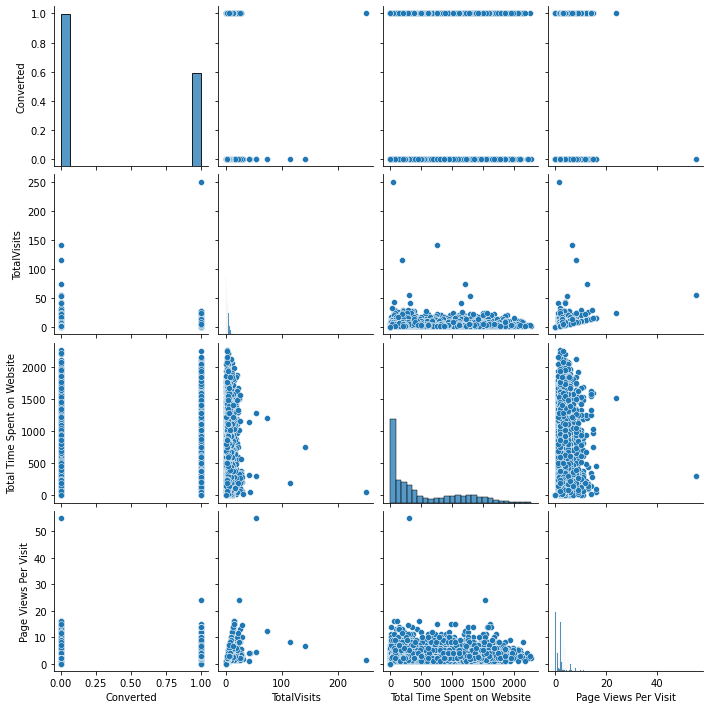

In [288]:
# Creating pairplot to visualize data and check for outliers

sns.pairplot(data, vars = ('Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit'))
plt.show()

 - The above graphs contain some Outliers but those can be ignored as they wont make much difference to our model

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

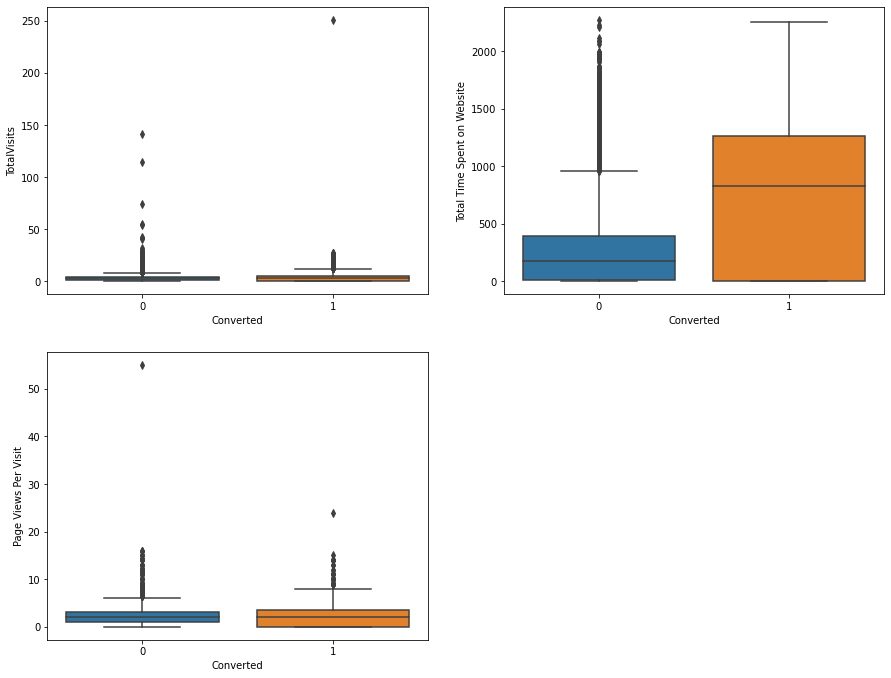

In [184]:
# Creating boxplot for numerical variables
plt.figure(figsize=(15, 18))
plt.subplot(3,2,1)
sns.boxplot(x ='Converted',y = 'TotalVisits', data= data)
plt.subplot(3,2,2)
sns.boxplot(x ='Converted',y = 'Total Time Spent on Website', data= data)
plt.subplot(3,2,3)
sns.boxplot(x ='Converted',y = 'Page Views Per Visit', data= data)

### Data Viz of Categorical columns w.r.t Target Variable

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Country                                 9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [186]:
# Creating a category column for visualization
category_col = ['Lead Origin','Do Not Email','Do Not Call','What is your current occupation','Search',
                'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                'A free copy of Mastering The Interview','Lead Source','Last Activity','Last Notable Activity']

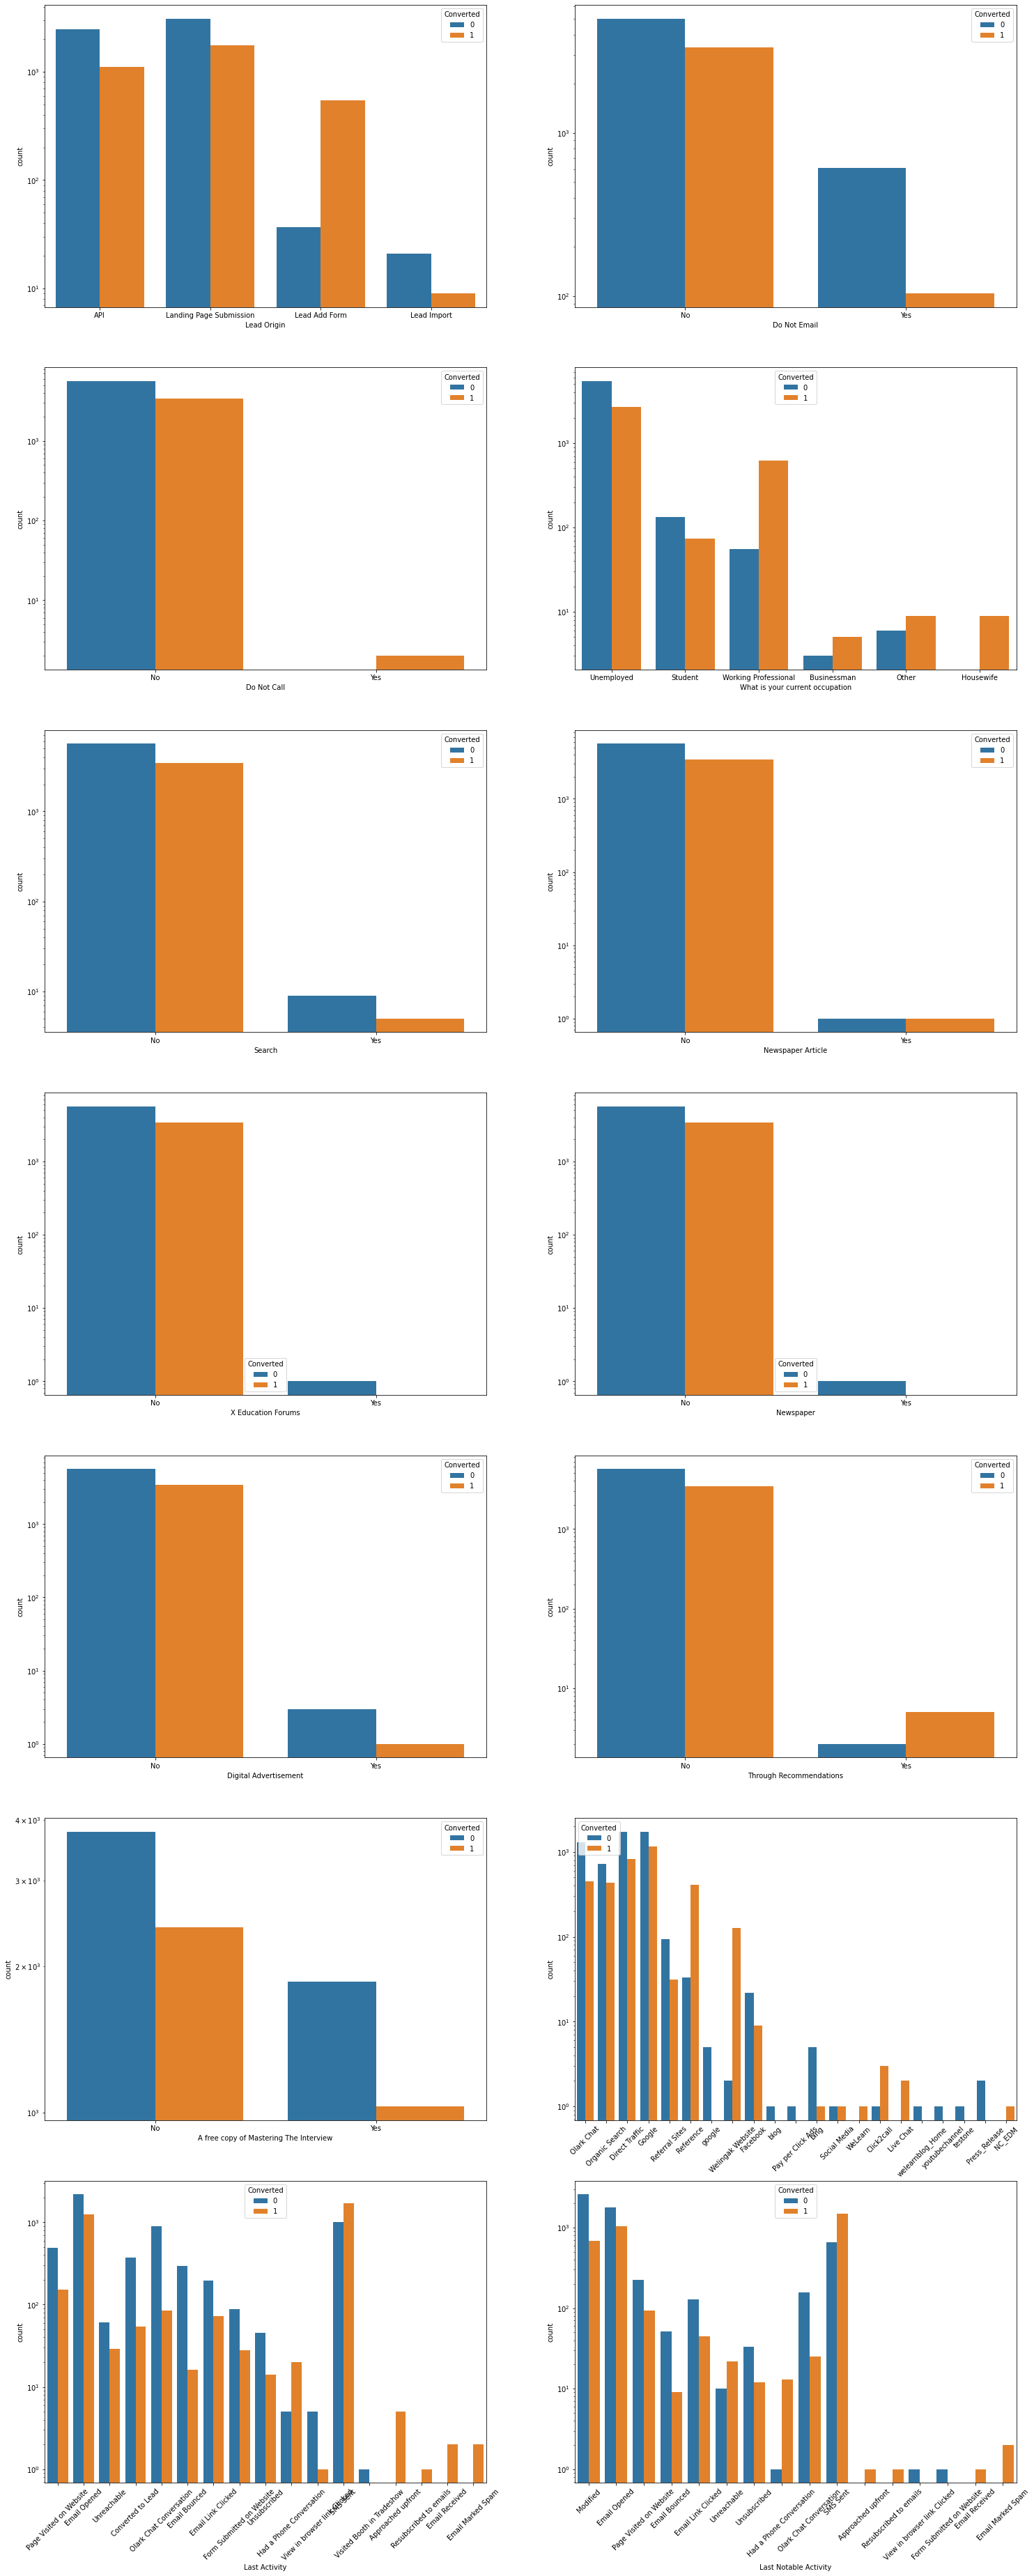

In [187]:
# Creating a define function to create vizualisation
plt.figure(figsize=(25,75))

for i in (enumerate(category_col)):
    plt.subplot(8,2,i[0]+1)
    sns.countplot(data=data,x=i[1],hue='Converted')
    if i[0] > 10:
        plt.xticks(rotation=45)
    plt.yscale("log")
plt.show()

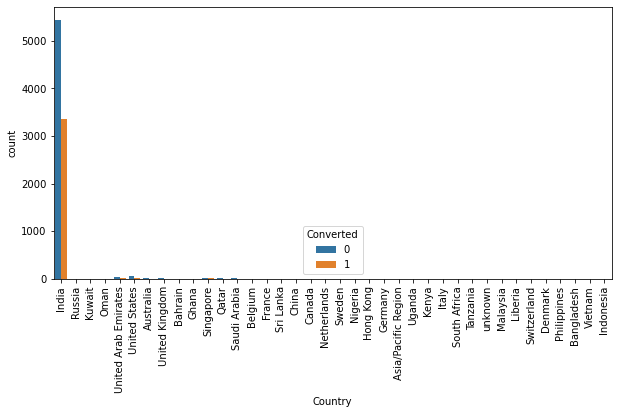

In [285]:
plt.figure(figsize =(10,5))
sns.countplot(data['Country'], hue=data.Converted)
plt.xticks(rotation = 90)
plt.show()

**Inferences**
  
* **Lead Source**

  1- Majority source of the Lead is Google & Direct Traffic.

  2- Lead Source from Google have highest probability of conversion.

  3- Leads with source Reference have maximum probability of conversion.
  
  **Lead Origin**

  1- Customers identified as Lead from Landing Page submission, constitute the  majority of the Leads.

  2- Customers originating from Lead Add Form have high probability of conversion, these customers are very few in number.

  3- Lead origin - API & Lead Import have the least convertion rate, customers from Lead Import are few in number.

* **Do Not Email**

 1- Customers who opt for Do Not Mail have lower conversion rate.

 2- Customers who do not opt for Do Not Mail have higher conversion rate around 40%.

* **Do Not Call**
 
  1- Customers who do not opt for Do Not Call have higher rate of conversion around 38%.

* **Last Activity**

 1- Customers whose Last activity was SMS Sent have higher conversion rate around 63%.

 2- Customers whose Last activity was Email Opened constitute majority of the customers with around 36% of conversion rate.



* **Specialization** 

 1- Maximum Leads have specialisation as Management & Others. 
 
 2- Leads with specialisation as Rural & Agribusiness have least probability of conversion.


* **What is your current occupation**

 1- Maximum Leads have occupation as Unemployed.
 2- Very few leads are Housewives


* **What matters most to you in choosing a career**

 1- Number of Leads to whom better career aspects matters most in choosing a career are m ore & have higher probability of conversion.

**Tags**

- More focus shall be given on the leads as will revert after reading the mail & others as these are potential leads and have higher rate of conversion.

**City**

- Majority of the leads are from Mumbai city. Customers from Mumbai city should be targeted more as these are the potential leads.
- A Free Copy Of Mastering the Interview
Customers who ask for free copy of mastering the interview are less in number but the conversion probability for both type of customers is similar.

**Last Notable Activity**
1- Customers whose last notable activity was Modified are more in number.
2- Customers whose last notable activity was SMS Sent have higher probability of conversion.

### Correlations between numerical variables 

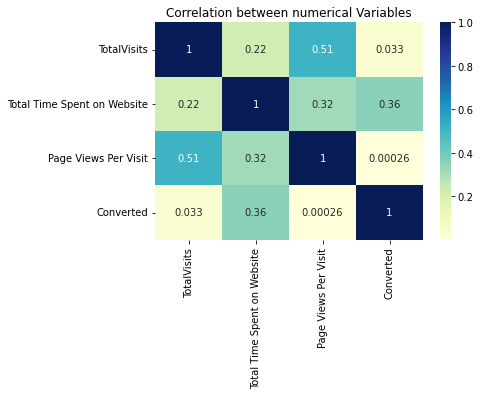

In [189]:
# Correlations between numeric values
sns.heatmap(data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']].corr() , cmap = 'YlGnBu', annot = True)
plt.title('Correlation between numerical Variables')
plt.show()

# Step 4 - Data Preparation

### Creating dummy variables

In [190]:
dummies = pd.get_dummies(data[['Lead Origin', 'Lead Source','Country','What is your current occupation','Last Activity','Last Notable Activity',
                              'Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                              'Through Recommendations','A free copy of Mastering The Interview']], drop_first= True)

In [191]:
# Concatenating dummies with original data
new_data = pd.concat([data,dummies], axis = 1)

In [192]:
# Checking how many columns we have created using dummies
new_data.shape

(9074, 124)

In [193]:
# Dropping the original columns from which the dummies were created
new_data.drop(['Lead Origin', 'Lead Source','Country','What is your current occupation','Last Activity',
               'Last Notable Activity','Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
               'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],
              axis=1,inplace = True)

In [194]:
new_data.shape

(9074, 109)

# Step- 5 Splitting the data into Training and testing sets

### Dividing Data into X and y 

In [195]:
# Put all the feature variables in X

X = new_data.drop(['Converted'], 1)

# Put the target variable in y

y = new_data['Converted']


In [196]:
print(X.shape)
print(y.shape)

(9074, 108)
(9074,)


In [197]:
# Importing the required libraries
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [198]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6351, 108)
(6351,)
(2723, 108)
(2723,)


## Rescaling features using Min-Max Scaling

In [199]:
#importing the minmaxscaler from sklearn
from sklearn.preprocessing import MinMaxScaler
#initiating an object
scaler = MinMaxScaler()
#Applying the scaling to all the numerical variable 
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [200]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.00000,6351.000000,6351.000000,6351.000000,6351.000000,6351.00000,6351.000000,6351.000000,6351.00000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.00000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0

### Checking Correlation among features/ Variables

<AxesSubplot:>

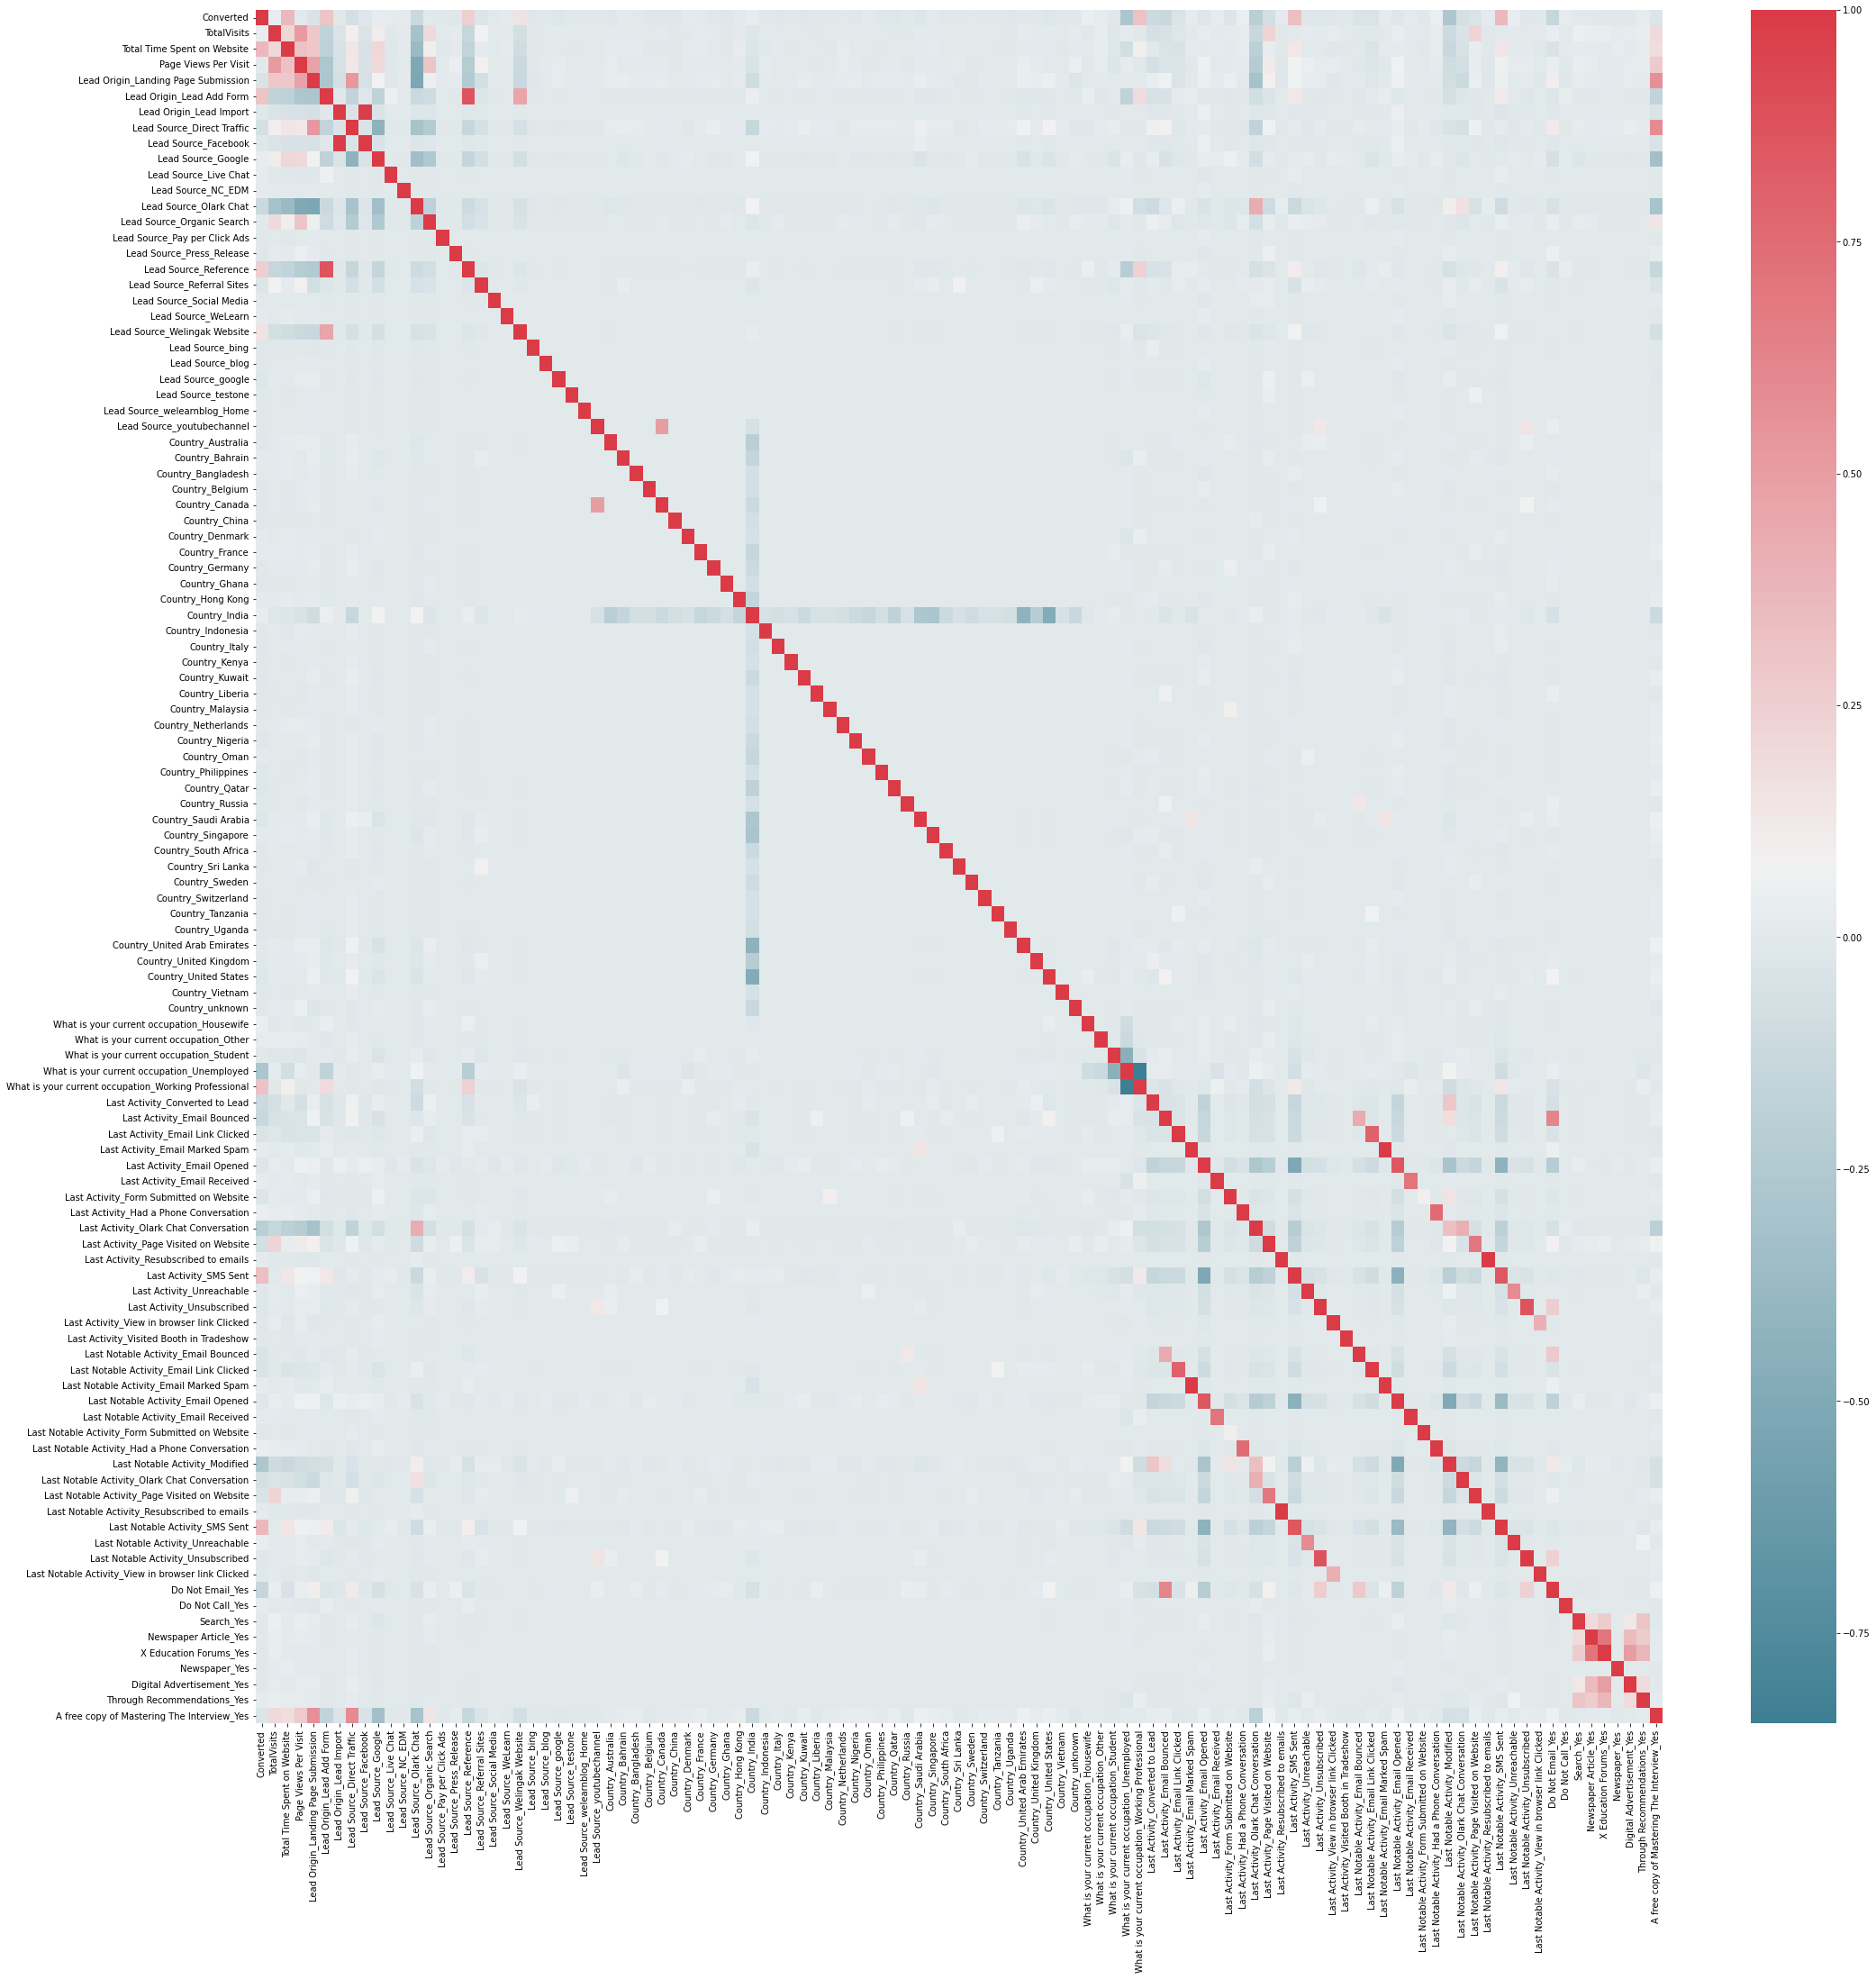

In [201]:
# Checking variable correlations using coefficients to see which variables are highly correlated 
plt.figure(figsize = (35,35))
sns.heatmap(new_data.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))

## Applying Recursive Feature Elimination ( RFE )

In [202]:
# Importing LogisticRegression to make a logistic regression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Importing RFE 
from sklearn.feature_selection import RFE
#Running RFE with 15 variables as the output
rfe = RFE(logreg, n_features_to_select= 15)                     
rfe = rfe.fit(X_train, y_train)

In [203]:
#RFE support shows which variables are significant and rfe ranking shows their ranks in order of significance 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 56),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 87),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 59),
 ('Lead Source_NC_EDM', False, 38),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 62),
 ('Lead Source_Press_Release', False, 65),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 91),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 90),
 ('Lead Source_blog', False, 39),
 ('Lead Source_google', False, 15),
 ('Lead Source_testone', False, 57),
 ('Lead Source_welearnblog_Home', False, 51),
 (

In [204]:
# Creating a variable for significant column and adding them in it 

col= X_train.columns[rfe.support_]
print(col)


Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Activity_Had a Phone Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website', 'Do Not Email_Yes'],
      dtype='object')


In [205]:
# Checking Columns which were rejected by RFE
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Country_Australia', 'Country_Bahrain', 'Country_Bangladesh',
       'Country_Belgium', 'Country_Canada', 'Country_China', 'Country_Denmark',
       'Country_France', 'Country_Germany', 'Country_Ghana',
       'Country_Hong Kong', 'Country_India', 'Country_Indonesia',
       'Country_Italy', 'Country_Kenya', 'Country_Kuwait', 'Country_Liberia',
       'Country_Malaysia', 'Country_Netherlands', 'C

In [206]:
# Selecting columns with RFE support = True
X_train_rfe = X_train[col]
X_train_rfe

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Activity_Had a Phone Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Do Not Email_Yes
3009,0.007968,0.178347,0,0,0,0,0,0,0,0,1,0,0,0,0
1012,0.007968,0.085355,0,0,0,0,0,1,0,0,0,0,0,0,1
9226,0.000000,0.000000,0,0,1,0,0,0,0,0,0,1,0,0,0
4750,0.007968,0.619946,0,0,0,0,0,0,0,0,0,0,0,0,0
7987,0.019920,0.711590,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.019920,0.363432,0,0,0,0,0,0,0,0,0,1,0,0,0
82,0.000000,0.000000,0,0,1,0,0,1,0,1,0,0,0,0,0
8199,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
7077,0.019920,0.206199,0,0,0,0,0,0,0,0,1,0,0,0,0


## VIF Value of Variables

In [207]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Lets create a function to calculate VIF value of Variables
def vif_val(vf):
    vif = pd.DataFrame()
    vif['Features'] = vf.columns
    vif['VIF'] = [variance_inflation_factor(vf.values, i) for i in range(vf.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [208]:
vif_val(X_train_rfe)

,Features,VIF
1,Total Time Spent on Website,1.65
0,TotalVisits,1.59
11,Last Notable Activity_Modified,1.53
2,Lead Origin_Lead Add Form,1.49
10,Last Notable Activity_Email Opened,1.46
4,Lead Source_Olark Chat,1.37
5,Lead Source_Welingak Website,1.33
7,What is your current occupation_Working Profes...,1.17
13,Last Notable Activity_Page Visited on Website,1.15
14,Do Not Email_Yes,1.10


# Step 6- Building Logistic Regression Model

### MODEL 1

In [209]:
# Importing Statsmodel
import statsmodels.api as sm
# Creating a constant 
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting a logistic regression model
logr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.7
Date:                Tue, 28 Feb 2023   Deviance:                       5321.4
Time:                        23:53:56   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3905
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9530      0.091    -10.529      0.000      -1.130      -0.776
TotalVisits                                              7.9465      2.191      3.627      0.000       3.653      12.240
Total Time Spent on Website                              4.6732      0.166     28.134      0.000       4.348       4.999
Lead Origin_Lead Add Form                                4.1786      0.227     18.406      0.000       3.734       4.624
Lead Origin_Lead Import                                  1.7328      0.463      3.741      0.000       0.825       2.641
Lead Source_Olark Chat                                   1.2244      0.107     11.446      0.000       1.015       1.434
Lead Source_Welingak Website                             2.1399      0.762      2.810      0.005       0.647       3.632
What is your current occupation_Housewife               22.8523   1.57e+04      0.001      0.999   -3.07e+04    3.08e+04
What is your current occupation_Working Professional     2.7435      0.188     14.621      0.000       2.376       3.111
Last Activity_Had a Phone Conversation                   2.0350      0.811      2.509      0.012       0.445       3.625
Last Notable Activity_Email Link Clicked                -1.8797      0.257     -7.300      0.000      -2.384      -1.375
Last Notable Activity_Email Opened                      -1.4176      0.089    -16.015      0.000      -1.591      -1.244
Last Notable Activity_Modified                          -2.1175      0.092    -22.968      0.000      -2.298      -1.937
Last Notable Activity_Olark Chat Conversation           -2.8017      0.328     -8.549      0.000      -3.444      -2.159
Last Notable Activity_Page Visited on Website           -1.8913      0.212     -8.923      0.000      -2.307      -1.476
Do Not Email_Yes                                        -1.8612      0.179    -10.380      0.000      -2.213      -1.510
========================================================================================================================
"""

### MODEL 2

In [210]:
# Dropping "What is your current occupation_Housewife" column as it has high p - value 
X_train_rfe1= X_train_rfe.drop("What is your current occupation_Housewife", axis = 1)

In [211]:
# Fitting a new model 
X_train_sm1 = sm.add_constant(X_train_rfe1)
logr1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial()).fit()
logr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.3
Date:                Tue, 28 Feb 2023   Deviance:                       5330.6
Time:                        23:53:57   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3896
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9512      0.090    -10.517      0.000      -1.128      -0.774
TotalVisits                                              7.8903      2.186      3.609      0.000       3.606      12.175
Total Time Spent on Website                              4.6715      0.166     28.156      0.000       4.346       4.997
Lead Origin_Lead Add Form                                4.1987      0.227     18.524      0.000       3.754       4.643
Lead Origin_Lead Import                                  1.7255      0.463      3.725      0.000       0.818       2.633
Lead Source_Olark Chat                                   1.2197      0.107     11.412      0.000       1.010       1.429
Lead Source_Welingak Website                             2.1157      0.761      2.778      0.005       0.623       3.608
What is your current occupation_Working Professional     2.7393      0.188     14.597      0.000       2.371       3.107
Last Activity_Had a Phone Conversation                   2.0345      0.811      2.508      0.012       0.445       3.624
Last Notable Activity_Email Link Clicked                -1.8671      0.256     -7.296      0.000      -2.369      -1.365
Last Notable Activity_Email Opened                      -1.4102      0.088    -15.947      0.000      -1.583      -1.237
Last Notable Activity_Modified                          -2.1167      0.092    -22.961      0.000      -2.297      -1.936
Last Notable Activity_Olark Chat Conversation           -2.7995      0.328     -8.544      0.000      -3.442      -2.157
Last Notable Activity_Page Visited on Website           -1.8898      0.212     -8.918      0.000      -2.305      -1.474
Do Not Email_Yes                                        -1.8618      0.179    -10.382      0.000      -2.213      -1.510
========================================================================================================================
"""

In [212]:
vif_val(X_train_sm1)

,Features,VIF
0,const,7.85
11,Last Notable Activity_Modified,1.61
10,Last Notable Activity_Email Opened,1.58
3,Lead Origin_Lead Add Form,1.54
5,Lead Source_Olark Chat,1.38
2,Total Time Spent on Website,1.32
6,Lead Source_Welingak Website,1.31
1,TotalVisits,1.22
13,Last Notable Activity_Page Visited on Website,1.16
7,What is your current occupation_Working Profes...,1.10


### MODEL 3 

In [213]:
# Dropping "Last Activity_Had a Phone Conversation" column as it has high p - value 
X_train_rfe2 = X_train_rfe1.drop("Last Activity_Had a Phone Conversation", axis = 1)

In [214]:
# Fitting a new model 
X_train_sm2 = sm.add_constant(X_train_rfe2)
logr2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()
logr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2669.4
Date:                Tue, 28 Feb 2023   Deviance:                       5338.8
Time:                        23:53:57   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3889
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9381      0.090    -10.393      0.000      -1.115      -0.761
TotalVisits                                              8.0227      2.193      3.659      0.000       3.725      12.320
Total Time Spent on Website                              4.6658      0.166     28.161      0.000       4.341       4.991
Lead Origin_Lead Add Form                                4.1932      0.227     18.501      0.000       3.749       4.637
Lead Origin_Lead Import                                  1.7223      0.463      3.719      0.000       0.815       2.630
Lead Source_Olark Chat                                   1.2132      0.107     11.357      0.000       1.004       1.423
Lead Source_Welingak Website                             2.1163      0.762      2.779      0.005       0.624       3.609
What is your current occupation_Working Professional     2.7352      0.188     14.580      0.000       2.367       3.103
Last Notable Activity_Email Link Clicked                -1.8784      0.256     -7.342      0.000      -2.380      -1.377
Last Notable Activity_Email Opened                      -1.4222      0.088    -16.101      0.000      -1.595      -1.249
Last Notable Activity_Modified                          -2.1211      0.092    -23.035      0.000      -2.302      -1.941
Last Notable Activity_Olark Chat Conversation           -2.8082      0.328     -8.571      0.000      -3.450      -2.166
Last Notable Activity_Page Visited on Website           -1.9048      0.212     -8.991      0.000      -2.320      -1.490
Do Not Email_Yes                                        -1.8708      0.179    -10.426      0.000      -2.222      -1.519
========================================================================================================================
"""

In [215]:
vif_val(X_train_sm2)

,Features,VIF
0,const,7.83
10,Last Notable Activity_Modified,1.61
9,Last Notable Activity_Email Opened,1.58
3,Lead Origin_Lead Add Form,1.54
5,Lead Source_Olark Chat,1.38
2,Total Time Spent on Website,1.32
6,Lead Source_Welingak Website,1.31
1,TotalVisits,1.22
12,Last Notable Activity_Page Visited on Website,1.15
7,What is your current occupation_Working Profes...,1.10


- From the above model we can conclude that we dont have any p-values which is more than 0.05 and vif value more than 5 

### Creating Prediction

In [216]:
# Predicting the probability of leads buying the course
y_train_pred = logr2.predict(X_train_sm2)
y_train_pred[:10]

3009    0.187808
1012    0.595910
9226    0.136345
4750    0.882712
7987    0.603665
1281    0.777689
2880    0.094824
4971    0.922429
7536    0.874949
1248    0.535568
dtype: float64

In [217]:
# Reshaping to an array so the index is in order

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18780842, 0.59590963, 0.13634487, 0.88271158, 0.60366498,
       0.77768876, 0.09482433, 0.92242906, 0.87494938, 0.53556821])

In [218]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.187808
1,0,0.595910
2,0,0.136345
3,1,0.882712
4,1,0.603665


In [219]:
# Now we will select a random cut - off point just to see the accuracy, sensitivity etc of the model then later we will select cut off point using ROC Curve
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.187808,0
1,0,0.595910,1
2,0,0.136345,0
3,1,0.882712,1
4,1,0.603665,1


## Creating Confusion Matrix

In [220]:
# Importing metrics from sklearn for creating model evaluation 

from sklearn import metrics

# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3459,  446],
       [ 746, 1700]], dtype=int64)

In [221]:
# Predicted/    not_churn    churn
# Actual
# not_churn        3459       446
# churn             746      1700

In [222]:
# Check the Accuracy of the model Predictions with formula correctly predicted labels / all labels

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100

81.2313021571406

- Accuracy is 81.23%

In [223]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1] 

# Substituting the value of false negatives
FN = confusion[1,0]

In [224]:
# Calculating the sensitivity

(TP/(TP+FN))*100

69.50122649223222

- Sensitivity is 69.50 %

In [225]:
# Calculating the specificity

(TN/(TN+FP))*100

88.57874519846351

- Specificity is 88.57%

## Creating a ROC curve to find a Cut off point

##### NOTE : The previous cut off point was randomly selected hence it wasnt reliable, now we will select cut off point using roc curve 

In [226]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [227]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,drop_intermediate = False )

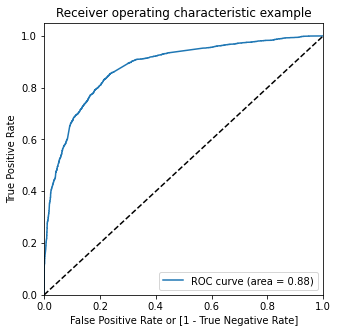

In [228]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- From the above diagram, we want the True Positive rate to be maximum while we want the False Positive Rate to be minimum 
- Hence the ROC Line will shoot straight up and then towards the right side of the graph 
- Area under roc curve is 88%

In [229]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187808,0,1,1,0,0,0,0,0,0,0,0
1,0,0.595910,1,1,1,1,1,1,1,0,0,0,0
2,0,0.136345,0,1,1,0,0,0,0,0,0,0,0
3,1,0.882712,1,1,1,1,1,1,1,1,1,1,0
4,1,0.603665,1,1,1,1,1,1,1,1,0,0,0


In [230]:
# Creating a dataframe to check the values of accuracy, sensitivity, and specificity at different value of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','Accuracy','Sensitivity','Specificity'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
cutoff_df

,prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.561486,0.972200,0.304225
0.2,0.2,0.762242,0.908422,0.670679
0.3,0.3,0.800031,0.843009,0.773111
0.4,0.4,0.809636,0.767375,0.836108
0.5,0.5,0.812313,0.695012,0.885787
0.6,0.6,0.792946,0.582993,0.924456
0.7,0.7,0.779562,0.511447,0.947503
0.8,0.8,0.758148,0.417825,0.971319
0.9,0.9,0.714848,0.277596,0.988732


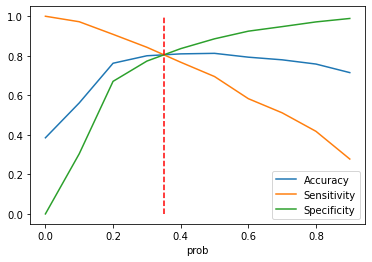

In [268]:
# Plotting the cutoff lines having accuracy , Sensitivity , Specificity and checking where they intersect 

cutoff_df.plot.line(x='prob', y=['Accuracy','Sensitivity','Specificity'])
plt.vlines(x=0.35,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

- From the above graph it can be seen that the cutoff point is 0.35%

In [232]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187808,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.595910,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.136345,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.882712,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.603665,1,1,1,1,1,1,1,1,0,0,0,1


In [233]:
# Check the overall Accuracy score 

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100

80.39678790741615

- The accuracy with cut off point 0.35 will be 80.39

In [234]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3144,  761],
       [ 484, 1962]], dtype=int64)

In [235]:
# Selecting the value of true positive
TP = confusion2[1,1]

# Selecting the value of true negatives
TN = confusion2[0,0]

# Selecting the value of false positives
FP = confusion2[0,1] 

# Selecting the value of false negatives
FN = confusion2[1,0]

In [236]:
# Calculating the sensitivity

(TP/(TP+FN))*100

80.21259198691742

In [237]:
# Calculating the specificity

(TN/(TN+FP))*100

80.51216389244559

### By selecting Cutoff of 0.35 we have

- Accuracy as 80.39
- Sensitivity as 80.21
- Specificity as 80.51

# Step 7 - Making Prediction on Test Dataset

In [238]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
count,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.00000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.0,2723.0,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.0,2723.0,2723.0,2723.000000,2723.0,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.0,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.0,2723.000000,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.000000,2723.000000,2723.0,2723.000000,2723.0,2723.000000,2723.0,2723.0,2723.0,2723.000000,2723.000000,2723.000000
mean,0.013625,0.215404,0.098081,0.543885,0.053250,0.002203,0.285347,0.002203,0.306647,0.0

## Dividing data in X_test and y_test

In [241]:
col = X_train_rfe2.columns

# Select the columns in X_train for X_test as well
X_test = X_test[col]

In [242]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [243]:
# Storing prediction of test set in the variable 'y_test_pred'

y_test_pred = logr2.predict(X_test_sm)

# Coverting it to a dataframe

y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to a dataframe

y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [244]:
# Appending y_test_df and y_pred_df together

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.129719
1,1,0.976012
2,0,0.105143
3,1,0.756580
4,0,0.146675


In [245]:
# Making the prediction using cut off as 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.129719,0
1,1,0.976012,1
2,0,0.105143,0
3,1,0.756580,1
4,0,0.146675,0
...,...,...,...
2718,0,0.226936,0
2719,0,0.146701,0
2720,1,0.892431,1
2721,0,0.131947,0


In [246]:
# Check the overall Accuracy of the model

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)*100

79.69151670951156

In [247]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1391,  343],
       [ 210,  779]], dtype=int64)

In [248]:
# Selecting the value of true positive
TP = confusion2[1,1]

# Selecting the value of true negatives
TN = confusion2[0,0]

# Selecting the value of false positives
FP = confusion2[0,1] 

# Selecting the value of false negatives
FN = confusion2[1,0]

In [249]:
# Calculating the sensitivity
(TP/(TP+FN))*100

78.76643073811931

- We obtained a sensitivity of 78.76

In [250]:
# Calculating the specificity

(TN/(TN+FP))*100

80.21914648212226

- We obtained a specificity of 80.21

## Using Precision and Recall to make a trade-off Curve

In [251]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

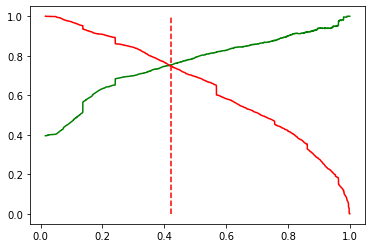

In [266]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.42,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

- Here the above Green line is indicating Precision and the Red line is indicating Recall
- Both the above lines are joining on 4.2

In [269]:
# Taking the Cut off value as 0.42
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187808,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.595910,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.136345,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.882712,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.603665,1,1,1,1,1,1,1,1,0,0,0,1


In [270]:
# Checking the accuracy of the model with trade off value as 0.42

(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))*100

80.86915446386396

In [271]:
# Creating confusion matrix once more

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3304,  601],
       [ 614, 1832]], dtype=int64)

In [272]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [273]:
# Taking Precision formula = TP / TP + FP

( TP / (TP + FP) ) * 100

75.29798602548294

In [274]:
# Taking Recall formula = TP / TP + FN

(TP/(TP+FN))*100

74.89779231398201

### RESULTS 

### For Training Data having a cutoff of .35 we got 
- Accuracy as 80.39
- Sensitivity as 80.21
- Specificity as 80.51

### Test Data

- Accuracy    : 79.69
- Sensitivity : 78.76
- Specificity : 80.21

### Precision and Recall results
##### We used a cut off value of .42 and got the following results

- Precision : 75.29
- Recall : 74.89

### From the above graph we can conclude the model has decent sensitivity, specificity and Accuracy. This will help the X education company find Hot Leads who will be more likely to buy their courses and save their time and resources